# What is quantum entanglement?
> OK, and so what?

- toc: true 
- badges: true
- comments: true
- categories: [quantum concepts]
- image: images/chart-preview.png

<img src="myimages/entangled_spins.svg" alt="Drawing" style="width: 200px;"/>

# Entanglement is the failure of states to factorize

I've known this formal definition of entanglement for years, but I am only appreciating many of its implications now. In this post I would like to share two aspects of it, but first for the formal definition.
    
So what is entanglement? Entanglement is what entangled states have. What are those? Take two spins. The state 

\begin{equation}
\frac1{\sqrt{2}}\Big(|\uparrow\uparrow\rangle+|\downarrow\downarrow\rangle\Big) \label{bell}
\end{equation}
is your canonical example of an entangled stated. In contrast, all the states below are *unentangled* 
\begin{align}
|\uparrow\uparrow\rangle,\qquad |\downarrow\uparrow\rangle,\qquad \frac1{\sqrt{2}}|\uparrow\rangle\Big(\uparrow\rangle-|\downarrow\rangle\Big),\qquad \frac1{\sqrt{2}}\Big(|\uparrow\rangle-|\downarrow\rangle\Big)\Big(\uparrow\rangle+|\downarrow\rangle\Big) \label{unen} 
\end{align}

The difference between \eqref{bell} and \eqref{unen} is the following. All latter states are actually *products* of the form $|\psi_1\rangle |\psi_2\rangle$ where $|\psi_1\rangle$ is the state of the first system and $|\psi_2\rangle$. In contrast, state \eqref{bell} *can not* be represented in as a product. It is instead a linear combination of factorized states which is not reducible to single product. You can *define* entangled states by this property of not being factorizible into wavefunctions of consistuent spins.

Now that we know what entangled states are it is perfectly reasonable to ask "So what"? Why are entangled states special? Why are they inherently quantum? I am going to give two angles on this questions, out of many possible.

## Entangled spin behaves very differently from unentangled
A spin which is not entangled can always be described by a direction $\bf n$ along which it is pointing $|\uparrow_{\bf n}\rangle$.  If one measures the component of the spin along this direction, the result is always $\frac12$. Such a measurement corresponds to a projector $P({\bf n})={\bf n}\cdot {\bf \sigma}=n_x \sigma_x+n_y\sigma_y+n_z\sigma_z$. If state $|\uparrow_{\bf n}\rangle$ is measured along a different axis $\bf n'$ the result depends on the angle $\theta$ between $\bf n$ and $\bf n'$. With probability $\cos^2\frac\theta2$ one gets projection $+\frac12$ and with probability $\sin^2\frac\theta2$ one gets $-\frac12$. However, for *any* state of the spin $|\psi\rangle$ there is an axis $\bf n$, such that measuring the spin along this axis gives $\frac12$ with probability one.

This is also true for any of the unentangled states \eqref{unen}. For example, measuring the projection of the first spin in the state $|\uparrow\uparrow\rangle\equiv |\uparrow_{\bf z}\uparrow_{\bf z}\rangle$ along $\bf z$ always gives $+\frac12$. As another example, since 
\begin{align}
|\downarrow_{\bf x}\rangle=\frac12\Big(|\uparrow_{\bf z}\rangle-|\downarrow_{\bf z}\rangle\Big) \label{xdown}
\end{align}
the state $\frac1{\sqrt{2}}\Big(|\uparrow\rangle-|\downarrow\rangle\Big)\Big(\uparrow\rangle+|\downarrow\rangle\Big)$ always registers $-\frac12$ when the projection of the first spin along $\bf x$ axis is measured.

In contrast, for the maximally entangled state \eqref{bell} the axis with a definite projection of the first spin **does not exist**. In fact, for all intents and purposes if you only look at observables associated with the first qubit, state \eqref{bell} behaves as a statistical ensemble of states $|\uparrow\rangle$ and $|\downarrow\rangle$, i.e.

\begin{align}
\frac1{\sqrt{2}}\Big(|\uparrow\uparrow\rangle+|\downarrow\downarrow\rangle\Big)\approx \cases{|\uparrow\rangle \text{ with probability $\frac12$}\\ |\downarrow\rangle \text{ with probability $\frac12$}} \label{bellapprox}
\end{align}

This means, for example, that projection onto $\bf z$ axis of the first spin is *completely* random: with probability $\frac12$ it behaves as $|\uparrow\rangle$ and gives projection $+\frac12$, with probability $\frac12$ it behaves as $|\downarrow\rangle$ and gives projection $-\frac12$. This is different from a coherent superposition of the up and down states, such as \eqref{xdown}. Although state \eqref{xdown} gives random results when measured along $\bf z$, it gives certain results when measured along $\bf x$. There is not such axis for state \eqref{bellapprox}. Although I do not prove it here, in fact the spin projection along *any* axis is completely random. 


To prove this fact I would need to go into some details of how one does construct an ensemble from an entangled state. This is not at all difficult but I won't do it here. I encourage an interested reader to consult John Preskill's notes ([chapter 2.3](http://www.theory.caltech.edu/~preskill/ph219/chap2_15.pdf)).

Instead, let me do a quick experimental check using `qiskit`. A Hadamard gate followed by a CNOT creates a bell state of two qubits.

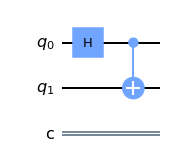

In [2]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 1)
qc.h(0)
qc.cx(0, 1)
qc.draw(output='mpl')

To my knowledge, one can only measure in the computational basis in `qiskit`, so get the spin projection along some axis we need first to rotate the spin and then measure. 

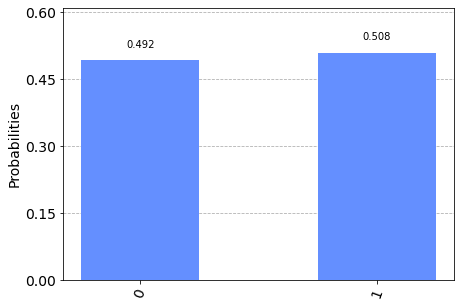

In [3]:
# Feel free to change these parameters and see if the outcome distribution changes.
theta, pi, lam = 0.13, 0.99, 0.37 

qc.u(theta, pi, lam, 0)
qc.measure(0, 0)

# Execute on a simulator and plot a histogram of the result.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

# Entanglement correlations are stronger than classical

First let me note that although we talked about the first spin before, the state \eqref{bell} is symmetric and everything equally applies to the second spin. Although the behavior of each of these spins is completely random, there are strong correlations among the them. If we can make measurments on both spins the state \eqref{bell} behaves as

\begin{align}
\frac1{\sqrt{2}}\Big(|\uparrow\uparrow\rangle+|\downarrow\downarrow\rangle\Big)\approx \cases{|\uparrow\uparrow\rangle \text{ with probability $\frac12$}\\ |\downarrow\downarrow\rangle \text{ with probability $\frac12$}} \label{bellapprox2}
\end{align}

So for example projections onto $\bf z$ axis of both spins are *always* the same, although random. Again, this in fact holds for *any* axis. Here is an experimental verification


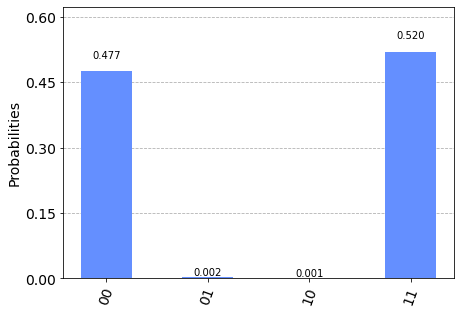

In [4]:
# Building Bell's state.
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Rotation of each qubit to simulate measurement along arbitary axis.
theta, pi, lam = 0.13, 0.99, 0.37 

qc.u(theta, pi, lam, 0)
qc.u(theta, pi, lam, 1)
qc.measure([0, 1], [0, 1])

# Simulate and plot results.
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

When seeing this for the first time there is definitely something to contemplate, like say an [EPR paradox](https://en.wikipedia.org/wiki/EPR_paradox#:~:text=The%20Einstein%E2%80%93Podolsky%E2%80%93Rosen%20paradox,by%20quantum%20mechanics%20was%20incomplete.). I will discuss just one manifestation of these quantum correlations that I became aware of recently, and which has a very concrete operational interpretation -- it allows a quantum team play a certain probabilistic game better than any classical team could!

So here is the setup. Alice and Bob are playing together against Charlie. Charlie sends random uncorrelated bits $x$ to Alice and $y$ to Bob. Admittedly, Charlie's job is not very creative and nothing in his strategy can be changed. Now, in response to the obtained bits Alice produces her output bit $a$ and Bob his $b$. Team A&B wins if $a\oplus b=x\land y$ where $\oplus$ is sum modulo 2 and $\land$ is the logical AND. Explicitly, if $x\land y=1$ both Alice and Bob got $x=y=1$ (which happens one quarter of the time) and they win iff they respond $a=0, b=1$ or $a=1, b=0$ so that $a\oplus b=1$. For all other inputs from Charlie, i.e. when $(x,y)$ is equal to $(0,0), (1,0)$ or $(0,1)$ the logical sum $x\land y=0$ and Alice and Bob win iff $a=0,b=0$ or $a=1, b=1$ so that $a\oplus b=0$.

Now, although in the same team, Alice and Bob can not communicate during the game. But they can discuss their strategy in advance. The best that a classical team can do is to win $75\%$ of the time. To achieve this winning rate it is sufficient to simply output $a=0, b=0$ irrespective of Charlie's bits $x,y$. This strategy only loses when $x=y=1$, i.e. one quarter of the time.

Now comes the interesting part. If Alice and Bob each have a spin, and these spins are entangled as in state \eqref{bell}, they can achieve the winning probability 
\begin{align}
P_{win}= \frac12+\frac1{2\sqrt{2}}\approx 0.85! \label{pwin}
\end{align}
So, what should they do? 

Define four axes $\bf n_1,n_2,n_3,n_4$ in the $\bf xz$ plane (of course there are many possibilities). Take ${\bf n_1}= (1,0)$, then ${\bf n_2}=(\frac1{\sqrt{2}},\frac1{\sqrt{2}})$ is counter-clockwise rotated by $\pi/4$ wrt to $\bf n_1$, ${\bf n_3}=(0,1)$ is rotated by $\pi/2$ and finally ${\bf n_4}=(-\frac1{\sqrt{2}},\frac1{\sqrt{2}})$ is rotated by $3\pi/4$.

<img src="myimages/axes.svg" alt="Drawing" style="width: 200px;"/>

Now here is the strategy that Alice and Bob could follow
\begin{align}
a(x)=\cases{P_{\bf n_3}, \qquad x=0 \\P_{\bf n_1}, \qquad x=1}\qquad\qquad b(y)=\cases{P_{\bf n_2}, \qquad y=0 \\P_{\bf n_4}, \qquad y=1} \label{abcases}
\end{align}

Where by $P_{\bf n}$ I mean (twice) the projection of Alice (or Bob's) spin onto the corresponding axis. An example: if Alice recieves $x=0$ and Bob $y=1$ Alice measures her spin along $n_1=\bf x$ axis and sends back the result, while Bob measures his spin along $n_3=\bf z$ axis and send his result.

Now, shall we check that this strategy indeed achieves the advertised winning probability 
\eqref{pwin}? Sure, I also though so.

In [5]:
import numpy as np

# Define rotation axes by their angles.
theta1 = 0
theta2 = np.pi/4
theta3 = np.pi/2
theta4 = 3*np.pi/4

def charlie():
    # Charlies job is to generate two random bits.
    return np.random.randint(0,1+1, size=(2))

def alice(x):
    # Alice decides on the measurement axis according to her strategy.
    if x==0:
        return theta3
    if x==1:
        return theta1

def bob(x):
    # Bob does his part of the protocol.
    if x==0:
        return theta2
    if x==1:
        return theta4
    
def one_round():
    
    # First we prepare an entangled state.
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    
    # Now Charlies generates his bits.
    x, y = charlie()
    
    # A&B team makes their move.
    a_angle = alice(x)
    b_angle = bob(y)
    
    # Again, we can not measure directly along the desired axes, 
    # but must rotate the qubits instead. Rotation in the xz plane is made by a `ry` gate.
    qc.ry(a_angle, 0) # Alice rotates her qubit.
    qc.ry(b_angle, 1) # Bob his.
    
    # Now we add measurments and actually run the circuit.
    qc.measure([0, 1], [0, 1])
    backend = BasicAer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts  = result.get_counts(qc)
    
    # Output of counts is a dict of the like `{'01': 1}`. This extracts the measurment resuls
    a, b = [int(c) for c in list(counts.keys())[0]]
    
    # And now we check, team A&B gogogo!
    return (a + b) % 2 == x * y

In [9]:
num_rounds = 2000

wins = 0
for _ in range(num_rounds):
    wins += one_round()
print ("Win probability:{}".format(wins/num_rounds))

Win probability:0.8565


So that's pretty close to the theoretical value \eqref{pwin}. Note that for each round of the game a new entangled pair is needed.

Now that we have seen that strategy *works* let us try to understand *why*. One thing Alice and Bob could do is to always measure along the same axes. Then, their results would be perfectly correlated (i.e. they always output $a=b=0$ or $a=b=1$) which gives 0.75 winning probability, the same as the best deterministic strategy. Now, in one quarter of cases, when $x=y=1$ they are better off outputting anticorrelated results. If we revisit figure under equation \eqref{abcases} we see that angle between $a(0)$ and $b(0)$ and between $a(0)$ and $b(1)$ is $\pi/4$ which still implies high correlation between them. The same holds for correlations between $b(0)$ and $a(0)$ and $b(0)$ and $a(1)$. The bonus now is that $a(1)$ and $b(1)$ have a strong negative correlation which pays off exactly when $x=y=1$. We have seen that all in all, this give a better strategy. One can also prove that \eqref{pwin} is the best one can do, see Preskill.

It is also reasonable to ask if a randomized classical strategy could give a better performance than deterministic $0.75$. Turns out, this is not the case.


Comment on classical random strategy.
It is not hard to see that there is no deterministic strategy that allows A&B win 100% of the time. Watch out for 0,1 vs -1, 1



### Notes:
- I talk about spins because they come with the useful geometrical intuition. The discussion applies equally to any type of qubit though.
- Maximally entangled